In [81]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
file_path = '/content/drive/MyDrive/processed_train_data_telugu1.csv'
data = pd.read_csv(file_path)

In [83]:
data.head()

,Text,Label
0,చీ నీయమ్మ జీవితం ఎవడో వేడిబుర్రపైన డొమెక్స్ ఇచ...,C
1,లైక్ కొట్టమని అడిగానా నచ్చితే లైక్ కొట్టండి లే...,C
2,చాలా ఇంపార్టెంట్ పాయింట్ ఏంటి అంటే మీరు లోపల ఎ...,G
3,గుద్ద ముయ్యి నువ్వు లంజ అంత చేసిదెంగి మళ్ళా మా...,C
4,భగవంతుడు పైన కాదు ఎక్కడో ఇక్కడ ఉన్నాడు అక్కడ ఉ...,N


In [84]:
X = data['Text']
y = data['Label']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [86]:
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=None)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [87]:
logistic_params = {'C': [0.1, 1, 10], 'penalty': ['l2']}
logistic_model = GridSearchCV(LogisticRegression(solver='liblinear'), logistic_params, cv=5, scoring='accuracy')
logistic_model.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

In [88]:
tree_params = {'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
tree_model = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='accuracy')
tree_model.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [76]:
forest_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
forest_model = GridSearchCV(RandomForestClassifier(), forest_params, cv=5, scoring='accuracy')
forest_model.fit(X_train_vectorized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [77]:
models = {
    "Logistic Regression": logistic_model.best_estimator_,
    "Decision Tree": tree_model.best_estimator_,
    "Random Forest": forest_model.best_estimator_,
}

results = []


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           C       0.85      0.82      0.84        40
           G       0.77      0.92      0.84        39
           N       0.90      0.70      0.79        40
           P       0.93      0.97      0.95        40
           R       0.92      0.92      0.92        39

    accuracy                           0.87       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



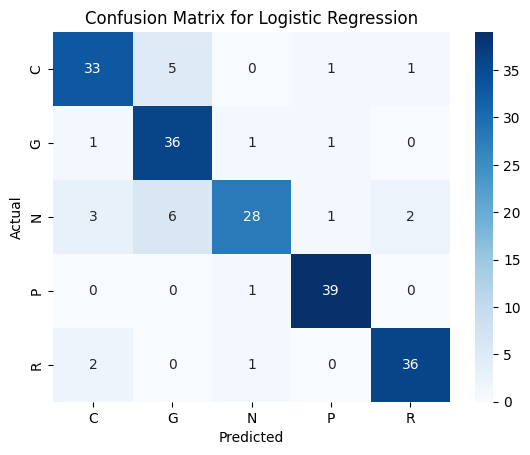


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           C       0.74      0.78      0.76        40
           G       0.85      0.87      0.86        39
           N       0.88      0.72      0.79        40
           P       0.85      0.97      0.91        40
           R       0.92      0.87      0.89        39

    accuracy                           0.84       198
   macro avg       0.85      0.84      0.84       198
weighted avg       0.85      0.84      0.84       198



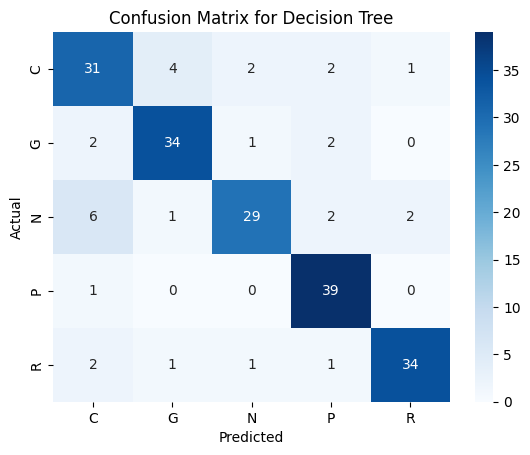


Classification Report for Random Forest:

              precision    recall  f1-score   support

           C       0.77      0.82      0.80        40
           G       0.79      0.97      0.87        39
           N       0.94      0.75      0.83        40
           P       0.98      1.00      0.99        40
           R       0.97      0.85      0.90        39

    accuracy                           0.88       198
   macro avg       0.89      0.88      0.88       198
weighted avg       0.89      0.88      0.88       198



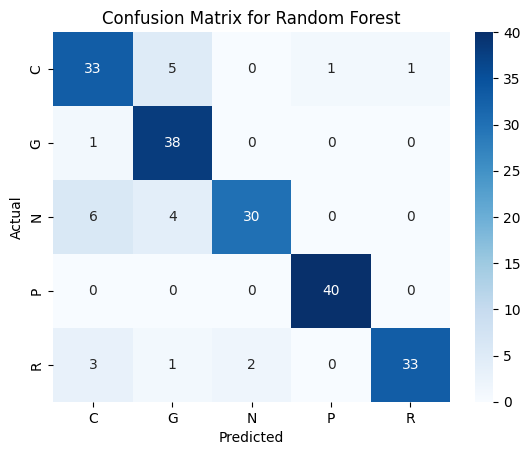

In [78]:
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test_vectorized)
    y_pred_proba = model.predict_proba(X_test_vectorized) if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results.append([model_name, accuracy, loss, macro_f1])

    # Classification report and heatmap
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [79]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Log Loss', 'Macro F1 Score'])
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                 Model  Accuracy  Log Loss  Macro F1 Score
0  Logistic Regression  0.868687  0.372303        0.867136
1        Decision Tree  0.843434  5.465787        0.842618
2        Random Forest  0.878788  0.479775        0.878768


In [80]:
test_file_path = '/content/drive/MyDrive/processed_test_data_telug.csv'
test_data = pd.read_csv(test_file_path)

X_test_final = vectorizer.transform(test_data['Transcript'])

test_data['Logistic Regression'] = models["Logistic Regression"].predict(X_test_final)
test_data['Decision Tree'] = models["Decision Tree"].predict(X_test_final)
test_data['Random Forest'] = models["Random Forest"].predict(X_test_final)

output_csv_path = '/content/drive/MyDrive/base_cv_predictions.csv'
test_data.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Predictions saved to {output_csv_path}")

Predictions saved to /content/drive/MyDrive/base_cv_predictions.csv
